# Shakthi
## Research question/interests

### **<ins>Question:</ins>** **What are the top 3 companies from the dataset?**

This question can be answered through deriving a formula which uses several factors in the dataset about the stock prices of each company over the years to determine the top 3 companies. We will be using the following columns from the dataset to derive the formula: Open, High, Low, Adj Close, Volume.

This question is important as it will make it clearer for us if the changes in stock prices in companies was because of a major event that affected the economic status of multiple companies, or was just a random fluctuation for that one company. The stock prices of different companies may fluctuate differently based on a wide range of factors, such as their individual financial performance, market trends, industry trends, and global economic conditions. 



A global recession will affect almost every single share in the stock market and will be valuable for future analysis. We can make out if a recession has happened by analyzing the dataset to see if at any point there was a common decline in prices for multiple companies. 



Distinction is important in understanding the stock market because we get to know how individual companies are affected by the same event, and how the market prices change with respect to that event. Hence, pattern analysis in the dataset is important to recognize potential causes of price jumps and drops.


## Exploratory Data Analysis
We will be using the pandas library to read the csv file and perform exploratory data analysis on the dataset. We will be using the matplotlib along with seaborn to plot the graph. The following code will be used to read the csv file and perform exploratory data analysis on the dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

# Read in the data
df = pd.read_csv('../data/processed/Merged.csv')
ls = [["Apple"]*2518, ["AMD"]*2518, ["Amazon"]*2518, ["Activision"]*2518, ["Ali Baba"]*2030, ["Bank of America"]*2518, ["Salesforce"]*2518, ["Cisco"]*2518, ["Disney"]*2518, ["EA"]*2518, ["Ford"]*2518, ["Google"]*2518, ["Intel"]*2518, ["JP Morgan"]*2518, ["CocoCola"]*2518, ["McDonalds"]*2518, ["Meta"]*2518, ["Microsoft"]*2518, ["Match"]*2518, ["Netflix"]*2518, ["Nvidia"]*2518, ["Pfizer"]*2518, ["Paypal"]*1887, ["AT & T"]*2518,["Tesla"]*2518, ["Trade Desk"]*1580, ["Walmart"]*2518, ["Exxon"]*2518, ["Yelp"]*2518, ["Zillow Group"]*2518]  # List for company column
comp = []

for i in ls:
    for j in i:
        comp.append(j)

df['Company'] = comp                  # Make a new column for company
df['Price Change'] = (df['Open']-df['Close']) / df['Open']*100   # Price change for each company
df['Market Value'] = df['Price Change'] * df['Volume']          # Market volume for each company

gr = df.groupby('Company')            # Describe individual company data
cleaned = gr.mean()                 # Average price for each company
print(cleaned)

                       Open        High         Low       Close   Adj Close  \
Company                                                                       
AMD               33.204932   33.889353   32.475774   33.189337   33.189337   
AT & T            25.128304   25.312110   24.932514   25.124129   16.850342   
Activision        51.137188   51.710064   50.492665   51.117224   50.024718   
Ali Baba         149.101281  150.929013  146.971012  148.962591  148.962591   
Amazon            73.823536   74.661898   72.881356   73.780049   73.780049   
Apple             62.383387   63.087693   61.696664   62.416599   60.637030   
Bank of America   24.969563   25.233654   24.696755   24.963757   22.988385   
Cisco             37.621763   37.965167   37.284484   37.634452   33.007038   
CocoCola          47.152371   47.473157   46.828098   47.156438   40.857747   
Disney           111.552605  112.525592  110.445580  111.496291  108.278421   
EA                89.991144   91.085445   88.850143 

### What we see from the above
The code above has added a company column to make things easier. Additional data such as price change (percent difference for closing and opening), a column called "Market Value" which is the product of the price change and Market Volume. Below we print out the top 3 companies with the highest market value.

In [21]:
cleaned.sort_values(by=['Market Value'], inplace=True, ascending=False) # Sort by price change
cleaned.head(3)   # Top 30 companies by Market Value
cleaned.tail(3)   # Bottom 30 companies by Market Value

,Open,High,Low,Close,Adj Close,Volume,Price Change,Market Value,Name
Company,,,,,,,,,
Trade Desk,34.334395,35.246731,33.405808,34.339534,34.339534,1.063140e+07,-0.090086,-4.162677e+06,Trade Desk
AMD,33.204932,33.889353,32.475774,33.189337,33.189337,5.131807e+07,-0.030563,-6.309399e+06,AMD
Tesla,73.168104,74.804530,71.355799,73.102271,73.102271,1.120960e+08,-0.037479,-1.195532e+07,Tesla


Below, some visualisation is done to provide the user with graphs for a clearer analysis of the results. The graphs are plotted using the matplotlib and seaborn libraries. The graphs are plotted using the data from the dataframe created above.

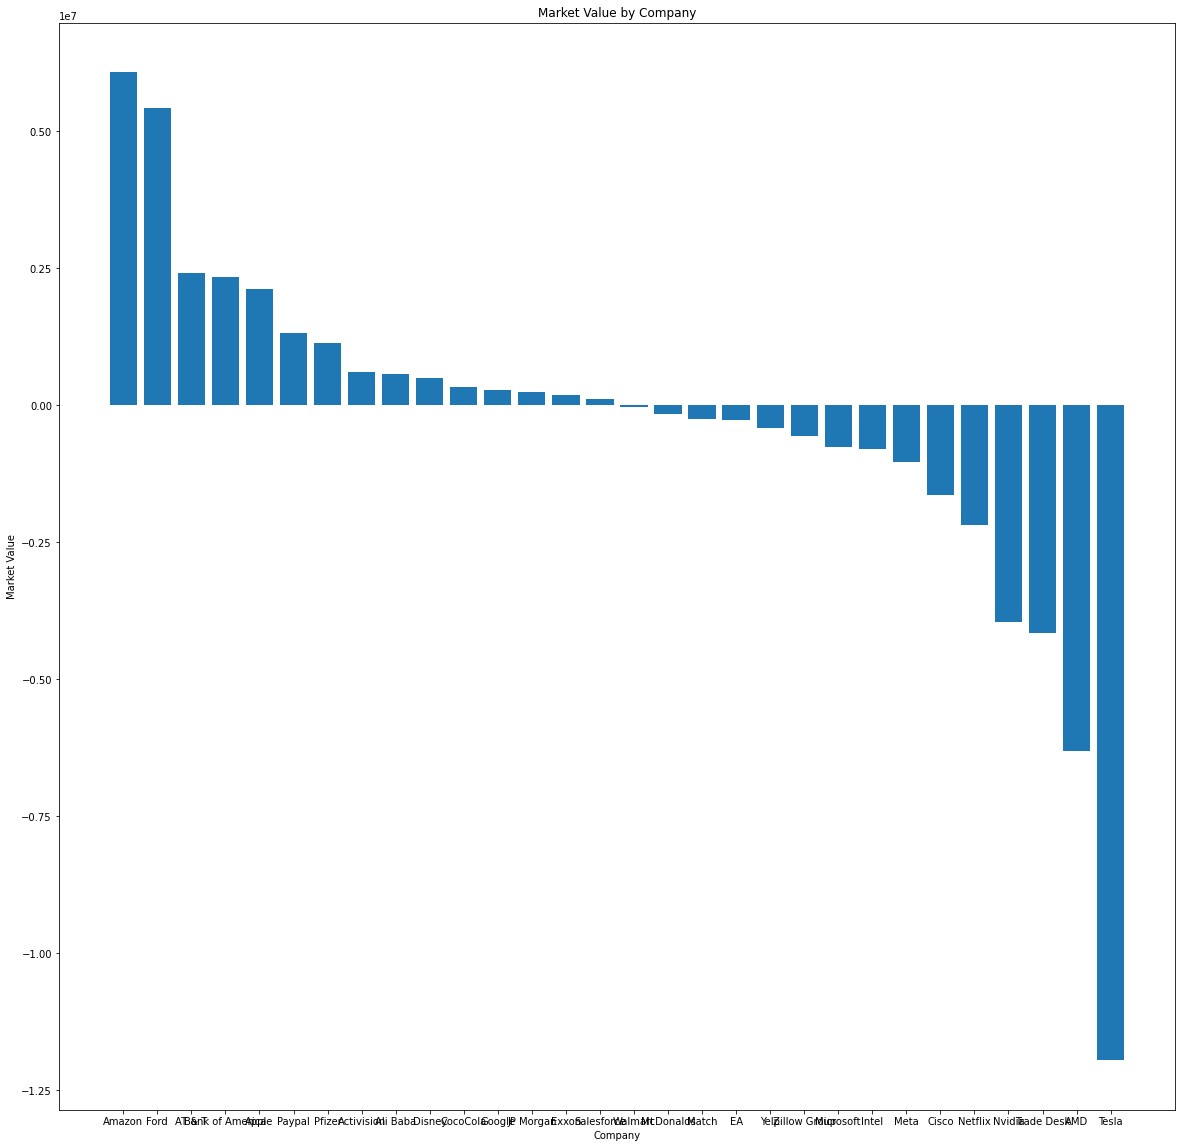

In [27]:
import matplotlib.pyplot as plt
#import seaborn as sns

# Plot the data
cleaned['Name'] = cleaned.index
plt.figure(figsize=(20,20))
plt.bar(cleaned['Name'], cleaned['Market Value'])
plt.xlabel('Company')
plt.ylabel('Market Value')
plt.title('Market Value by Company')

plt.show()